In [1]:
%matplotlib inline
from pylab import *
import numpy as np

In [2]:
Tice = 271.15            # temperature of ice
H = 1                    # heat capacity of upper ocean layer
F0 = 3.0                 # F_0 value to be used to find value of atmospheric heat transport parameter
A = -49.7                # Budyko-Sellers constant
B = 0.29                 # Budyko-Sellers constant
alpha = 0.29             # effective ice albedo
epsilon = [[1.0,0.0],[0.0,1.0]]            # forcing parameter matrix
length = len(epsilon)
S1 = 40.9                # net incoming solar flux for T_1 box
S2 = 24.1                # net incoming solar flux for T_2 box
gamma1 = 0.035           # constant used to find value of atmospheric heat transport parameter
gamma2 = 0.002852        # constant used to find value of atmospheric heat transport parameter
T10 = 280.0              # initial temperature of T_1 box in kelvin
T20 = 260.0              # initial temperature of T_2 box in kelvin

In [3]:
def HdT1(F,T1,epsilon): # function that gives the value of H*dT_1/dt
    return S1-F-(A+B*T1)+epsilon

def HdT2(a,F,T2,epsilon): # function that gives the value of H*dT_2/dt
    return S2*(1-2*alpha*a)+F-(A+B*T2)+epsilon

def C(T1):               # function that gives value of C(T_1)
    top = T1 - 273.15    # top of fraction in exponential
    bottom = T1 - 35.86  # bottom of fraction in exponential
    fract = top / bottom # fraction in exponential
    return 6.11 * exp(17.23 * fract)

def newF(T1,T2): # function that gives value of atmospheric heat transport parameter
    return F0 + gamma1 * (T1 - T2) + gamma2 * C(T1) * (T1 - T2)

def newa(T1,T2): # function that gives value of fractional area of hemisphere covered in ice
    phiicedeg = 30 + 30 * (T1 - Tice) / (T1 - T2) # phi_ice in degrees
    phiicerad = phiicedeg * pi / 180.0            # phi_ice in radians
    return 1 - sin(phiicerad)

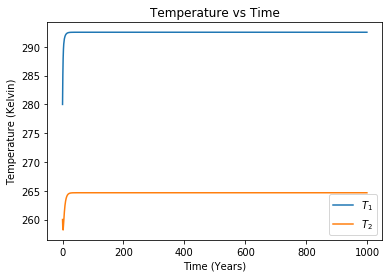

In [4]:
# With all feedbacks on and no forcing
dt = 1.0                 # time step
maxtime = 1000            # length of simulation
t = arange(0,maxtime,dt) # time array
T1 = zeros(maxtime)   # temperature array for T_1 box
T2 = zeros(maxtime)   # temperature array for T_2 box
a = zeros(maxtime)    # fractional area of hemisphere covered in ice array
F = zeros(maxtime)    # atmospheric heat transport array
T1[0] = T10           # sets initial temperature for T_1 box
T2[0] = T20           # sets initial temperature for T_2 box
for i in range(0,len(t)-1):                   # creates loop that cycles through all of the arrays
    F[i] = newF(T1[i],T2[i]) # sets new F value
    a[i] = newa(T1[i],T2[i])             # sets new a value
    T1[i+1] = T1[i] + (HdT1(F[i],T1[i],0.0)) / H * dt             # updates temperature for T_1 box
    T2[i+1] = T2[i] + (HdT2(a[i],F[i],T2[i],0.0)) / H * dt  # updates temperature for T_2 box
plot(t,T1,label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,T2,label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [5]:
aeq = a[-2]             # a value at equilibrium
Feq = F[-2]
print(aeq,Feq)

0.20123578072486314 5.762513541945422


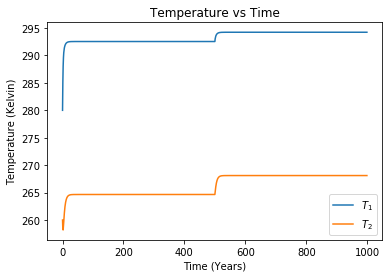

[[1.69133633 3.45212648]
 [1.69133633 3.45212648]]


In [6]:
# With all feedbacks on
t = arange(0,maxtime,dt) # time array
Tfon = zeros((2,length,maxtime))
Teqfon = zeros((2,2))
dTfon = zeros((2,2))
a = zeros((length,maxtime))    # fractional area of hemisphere covered in ice array
F = zeros((length,maxtime))    # atmospheric heat transport array
Tfon[0,:,0] = T10           # sets initial temperature for T_1 box
Tfon[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        F[i][j] = newF(Tfon[0][i][j],Tfon[1][i][j]) # sets new F value
        a[i][j] = newa(Tfon[0][i][j],Tfon[1][i][j])             # sets new a value  
        if j < maxtime / 2.0:
            Teqfon[i][0] = Tfon[0][i][j]
            Teqfon[i][1] = Tfon[1][i][j]
            Tfon[0][i][j+1] = Tfon[0][i][j] + (HdT1(F[i][j],Tfon[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tfon[1][i][j+1] = Tfon[1][i][j] + (HdT2(a[i][j],F[i][j],Tfon[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tfon[0][i][j+1] = Tfon[0][i][j] + (HdT1(F[i][j],Tfon[0][i][j],0.5)) / H * dt#epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tfon[1][i][j+1] = Tfon[1][i][j] + (HdT2(a[i][j],F[i][j],Tfon[1][i][j],0.5)) / H * dt#epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTfon[i][0] = Tfon[0][i][-1] - Teqfon[i][0]
    dTfon[i][1] = Tfon[1][i][-1] - Teqfon[i][1]
plot(t,Tfon[0][0],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Tfon[1][0],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()
print(dTfon)

In [7]:
lambdafon = np.matrix.transpose(dTfon)
print(lambdafon)

[[1.69133633 1.69133633]
 [3.45212648 3.45212648]]


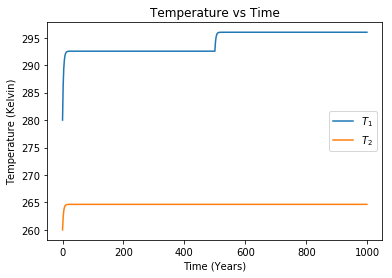

In [8]:
# With all feedbacks off
t = arange(0,maxtime,dt) # time array
Tfoff = zeros((2,length,maxtime))
Teqfoff = zeros((2,2))
dTfoff = zeros((2,2))
Tfoff[0,:,0] = T10           # sets initial temperature for T_1 box
Tfoff[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        if j < maxtime / 2.0:
            Teqfoff[i][0] = Tfoff[0][i][j]
            Teqfoff[i][1] = Tfoff[1][i][j]
            Tfoff[0][i][j+1] = Tfoff[0][i][j] + (HdT1(Feq,Tfoff[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tfoff[1][i][j+1] = Tfoff[1][i][j] + (HdT2(aeq,Feq,Tfoff[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tfoff[0][i][j+1] = Tfoff[0][i][j] + (HdT1(Feq,Tfoff[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tfoff[1][i][j+1] = Tfoff[1][i][j] + (HdT2(aeq,Feq,Tfoff[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTfoff[i][0] = Tfoff[0][i][-1] - Teqfoff[i][0]
    dTfoff[i][1] = Tfoff[1][i][-1] - Teqfoff[i][1]
plot(t,Tfoff[0][0],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Tfoff[1][0],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [9]:
lambdafoff = np.matrix.transpose(dTfoff)
print(lambdafoff)

[[3.44827586 0.        ]
 [0.         3.44827586]]


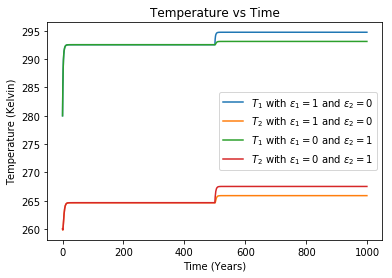

In [10]:
# Top-down
t = arange(0,maxtime,dt) # time array
Ttd = zeros((2,length,maxtime))
avgTtd = zeros((length,maxtime))
Teqtd = zeros((2,2))
dTtd = zeros((2,2))
F = zeros((length,maxtime))    # atmospheric heat transport array
Ttd[0,:,0] = T10           # sets initial temperature for T_1 box
Ttd[1,:,0] = T20           # sets initial temperature for T_2 box
avgTtd[:,0] = (T10 + T20) * 0.5
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        F[i][j] = newF(Ttd[0][i][j],Ttd[1][i][j]) # sets new F value
        if j < maxtime / 2.0:
            Teqtd[i][0] = Ttd[0][i][j]
            Teqtd[i][1] = Ttd[1][i][j]
            Ttd[0][i][j+1] = Ttd[0][i][j] + (HdT1(F[i][j],Ttd[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Ttd[1][i][j+1] = Ttd[1][i][j] + (HdT2(aeq,F[i][j],Ttd[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
            avgTtd[i][j+1] = (Ttd[0][i][j+1] + Ttd[1][i][j+1]) * 0.5
        else:
            Ttd[0][i][j+1] = Ttd[0][i][j] + (HdT1(F[i][j],Ttd[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Ttd[1][i][j+1] = Ttd[1][i][j] + (HdT2(aeq,F[i][j],Ttd[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
            avgTtd[i][j+1] = (Ttd[0][i][j+1] + Ttd[1][i][j+1]) * 0.5
    dTtd[i][0] = Ttd[0][i][-1] - Teqtd[i][0]
    dTtd[i][1] = Ttd[1][i][-1] - Teqtd[i][1]
plot(t,Ttd[0][0],label="$T_1$ with $\epsilon_1=1$ and $\epsilon_2=0$")
plot(t,Ttd[1][0],label="$T_2$ with $\epsilon_1=1$ and $\epsilon_2=0$")
plot(t,Ttd[0][1],label="$T_1$ with $\epsilon_1=0$ and $\epsilon_2=1$")        # plots temperature vs time graph for T_1 box
plot(t,Ttd[1][1],label="$T_2$ with $\epsilon_1=0$ and $\epsilon_2=1$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [11]:
lambdatd = np.matrix.transpose(dTtd)
invlambdatd = np.linalg.inv(lambdatd)
Gtd = np.dot(lambdafon,invlambdatd)
print(Gtd,Gtd[0][0] + Gtd[0][1],Gtd[1][0] + Gtd[1][1])

[[0.49048753 0.49048753]
 [1.00111668 1.00111668]] 0.9809750696581944 2.0022333582159653


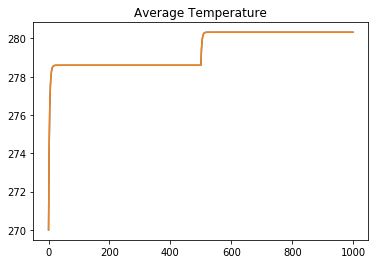

In [12]:
plot(t,avgTtd[0])
plot(t,avgTtd[1])
title("Average Temperature")
show()

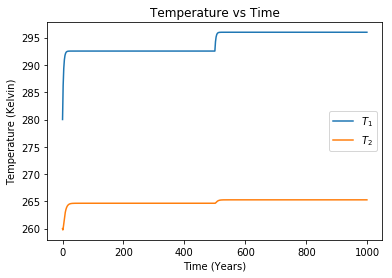

In [13]:
# Bottom-up
t = arange(0,maxtime,dt) # time array
Tbu = zeros((2,length,maxtime))
Teqbu = zeros((2,2))
dTbu = zeros((2,2))
a = zeros((length,maxtime))    # fractional area of hemisphere covered in ice array
Tbu[0,:,0] = T10           # sets initial temperature for T_1 box
Tbu[1,:,0] = T20           # sets initial temperature for T_2 box
avgTbu = zeros((length,maxtime))
avgTbu
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        a[i][j] = newa(Tbu[0][i][j],Tbu[1][i][j])             # sets new a value  
        if j < maxtime / 2.0:
            Teqbu[i][0] = Tbu[0][i][j]
            Teqbu[i][1] = Tbu[1][i][j]
            Tbu[0][i][j+1] = Tbu[0][i][j] + (HdT1(Feq,Tbu[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tbu[1][i][j+1] = Tbu[1][i][j] + (HdT2(a[i][j],Feq,Tbu[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tbu[0][i][j+1] = Tbu[0][i][j] + (HdT1(Feq,Tbu[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tbu[1][i][j+1] = Tbu[1][i][j] + (HdT2(a[i][j],Feq,Tbu[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTbu[i][0] = Tbu[0][i][-1] - Teqbu[i][0]
    dTbu[i][1] = Tbu[1][i][-1] - Teqbu[i][1]
plot(t,Tbu[0][0],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Tbu[1][0],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [14]:
lambdabu = np.matrix.transpose(dTbu)
invlambdafoff = np.linalg.inv(lambdafoff)
Gbu = np.dot(lambdabu,invlambdafoff)
print(Gbu)

[[1.         0.        ]
 [0.18118283 2.02364753]]


In [33]:
length1 = 10
rad = linspace(0,1,length1)
forcing = zeros((length1,2))
forcing[:,0] = rad
forcing[:,1] = 1 - rad
Tfon = zeros((2,length1,maxtime))
Teqfon = zeros((length1,2))
dTfon = zeros((length1,2))
Tfon[0,:,0] = T10           # sets initial temperature for T_1 box
Tfon[1,:,0] = T20

for j in range(0,length1):
    for k in range(0,len(t)-1):
        for i in forcing:   # creates loop that cycles through all of the arrays
            F = newF(Tfon[0][j][k],Tfon[1][j][k]) # sets new F value
            a = newa(Tfon[0][j][k],Tfon[1][j][k])             # sets new a value  
            if k < maxtime / 2.0:
                Teqfon[j][0] = Tfon[0][j][k]
                Teqfon[j][1] = Tfon[1][j][k]
                Tfon[0][j][k+1] = Tfon[0][j][k] + (HdT1(F,Tfon[0][j][k],0.0)) / H * dt             # updates temperature for T_1 box
                Tfon[1][j][k+1] = Tfon[1][j][k] + (HdT2(a,F,Tfon[1][j][k],0.0)) / H * dt  # updates temperature for T_2 box
            else:
                Tfon[0][j][k+1] = Tfon[0][j][k] + (HdT1(F,Tfon[0][j][k],i[0])) / H * dt             # updates temperature for T_1 box
                Tfon[1][j][k+1] = Tfon[1][j][k] + (HdT2(a,F,Tfon[1][j][k],i[1])) / H * dt  # updates temperature for T_2 box
            dTfon[j][0] = Tfon[0][j][-1] - Teqfon[j][0]
            dTfon[j][1] = Tfon[1][j][-1] - Teqfon[j][1]

In [34]:
np.matrix.transpose(dTfon)

array([[2.40516417, 2.40516417, 2.40516417, 2.40516417, 2.40516417,
        2.40516417, 2.40516417, 2.40516417, 2.40516417, 2.40516417],
       [2.24197943, 2.24197943, 2.24197943, 2.24197943, 2.24197943,
        2.24197943, 2.24197943, 2.24197943, 2.24197943, 2.24197943]])

In [427]:
epsilon = [[-0.7,0.3],[-0.3,0.7]]
t = arange(0,maxtime,dt) # time array
Tfon = zeros((2,length,maxtime))
Teqfon = zeros((2,2))
dTfon = zeros((2,2))
a = zeros((length,maxtime))    # fractional area of hemisphere covered in ice array
F = zeros((length,maxtime))    # atmospheric heat transport array
Tfon[0,:,0] = T10           # sets initial temperature for T_1 box
Tfon[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        F[i][j] = newF(Tfon[0][i][j],Tfon[1][i][j]) # sets new F value
        a[i][j] = newa(Tfon[0][i][j],Tfon[1][i][j])             # sets new a value  
        if j < maxtime / 2.0:
            Teqfon[i][0] = Tfon[0][i][j]
            Teqfon[i][1] = Tfon[1][i][j]
            Tfon[0][i][j+1] = Tfon[0][i][j] + (HdT1(F[i][j],Tfon[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tfon[1][i][j+1] = Tfon[1][i][j] + (HdT2(a[i][j],F[i][j],Tfon[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tfon[0][i][j+1] = Tfon[0][i][j] + (HdT1(F[i][j],Tfon[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tfon[1][i][j+1] = Tfon[1][i][j] + (HdT2(a[i][j],F[i][j],Tfon[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTfon[i][0] = Tfon[0][i][-1] - Teqfon[i][0]
    dTfon[i][1] = Tfon[1][i][-1] - Teqfon[i][1]

In [428]:
dTlistfon = np.matrix.transpose(dTfon)
print(dTlistfon)

[[-1.46588183 -0.08026625]
 [-0.19555476  2.63249181]]


In [429]:
# Top-down
t = arange(0,maxtime,dt) # time array
Ttd = zeros((2,length,maxtime))
avgTtd = zeros((length,maxtime))
Teqtd = zeros((2,2))
dTtd = zeros((2,2))
F = zeros((length,maxtime))    # atmospheric heat transport array
Ttd[0,:,0] = T10           # sets initial temperature for T_1 box
Ttd[1,:,0] = T20           # sets initial temperature for T_2 box
avgTtd[:,0] = (T10 + T20) * 0.5
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        F[i][j] = newF(Ttd[0][i][j],Ttd[1][i][j]) # sets new F value
        if j < maxtime / 2.0:
            Teqtd[i][0] = Ttd[0][i][j]
            Teqtd[i][1] = Ttd[1][i][j]
            Ttd[0][i][j+1] = Ttd[0][i][j] + (HdT1(F[i][j],Ttd[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Ttd[1][i][j+1] = Ttd[1][i][j] + (HdT2(aeq,F[i][j],Ttd[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
            avgTtd[i][j+1] = (Ttd[0][i][j+1] + Ttd[1][i][j+1]) * 0.5
        else:
            Ttd[0][i][j+1] = Ttd[0][i][j] + (HdT1(F[i][j],Ttd[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Ttd[1][i][j+1] = Ttd[1][i][j] + (HdT2(aeq,F[i][j],Ttd[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
            avgTtd[i][j+1] = (Ttd[0][i][j+1] + Ttd[1][i][j+1]) * 0.5
    dTtd[i][0] = Ttd[0][i][-1] - Teqtd[i][0]
    dTtd[i][1] = Ttd[1][i][-1] - Teqtd[i][1]

In [430]:
dTlisttd = np.matrix.transpose(dTtd)
print(dTlisttd)
print(dTlistfon)
print(np.dot(Gtd,dTlisttd))

[[-1.41994838 -0.27666838]
 [ 0.04063804  1.65597873]]
[[-1.46588183 -0.08026625]
 [-0.19555476  2.63249181]]
[[-1.4381119  -0.05764088]
 [-0.04692802  2.71722762]]


In [431]:
print((dTlistfon-np.dot(Gtd,dTlisttd)) / (dTlistfon + np.dot(Gtd,dTlisttd) / 2.0) * 100)

[[  1.27097108  20.74072277]
 [ 67.86027426  -2.1231163 ]]
